#    Task 1 : TITANIC SURVIVAL PRIDICTION

# problem statement :
     
######    We have utilized the Titanic dataset from Kaggle, which includes several key features to analyze and build predictive models. These features include PassengerId, which uniquely identifies each passenger, Survived, indicating whether the passenger survived the disaster, and Pclass, representing the passenger's ticket class. Other features include Name, Sex, and Age, which provide demographic information, along with SibSp and Parch, detailing the number of siblings, spouses, parents, or children aboard. The dataset also includes Ticket and Fare, which indicate the ticket number and price, Cabin, identifying the passenger's cabin number, and Embarked, specifying the port of embarkation.








In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r'C:\Users\umang\Downloads\archive(7)\Titanic-Dataset.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(['Cabin'], axis=1,inplace=True)

# Dropped Cabin Column because too many null values

In [8]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [13]:
df.duplicated().sum()

0

# Analysis

### Survived Column

In [17]:
survived_counts = df['Survived'].value_counts()
survived_counts

Survived
0    424
1    288
Name: count, dtype: int64

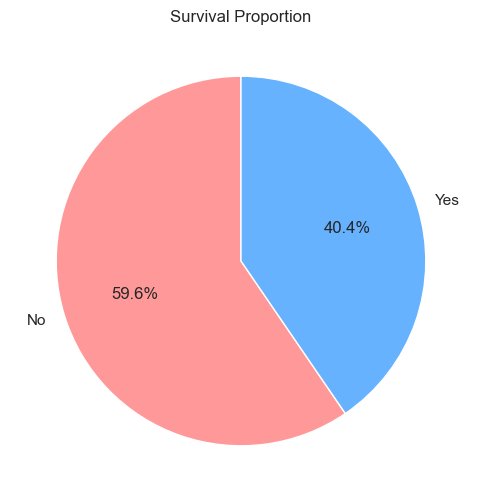

In [18]:
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Survival Proportion')
plt.show()

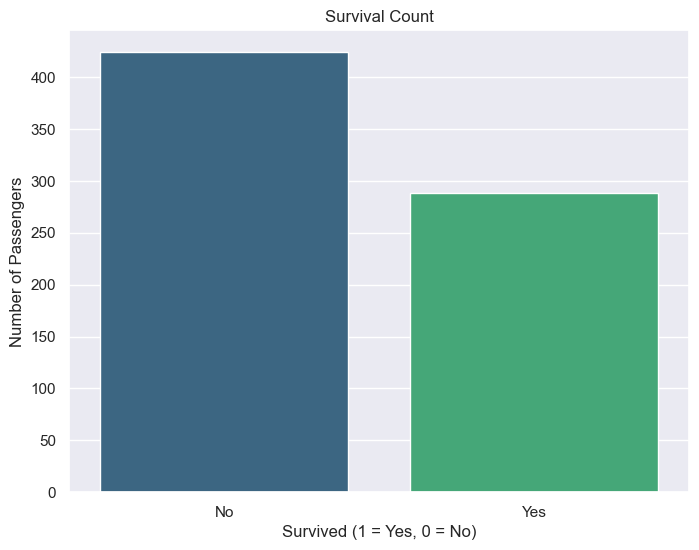

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


### Pclass Column

In [20]:
df['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

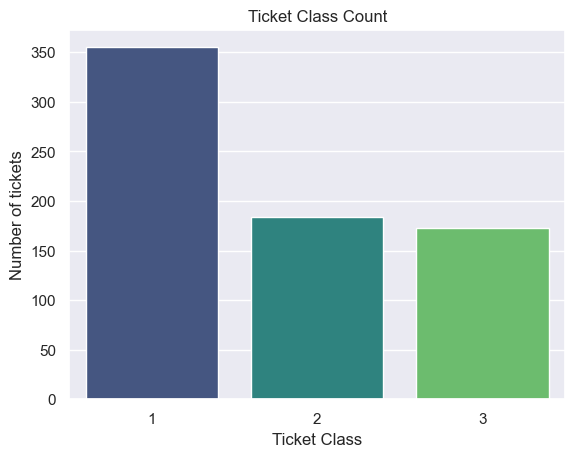

In [21]:
sns.barplot(x=[1,2,3],y=df['Pclass'].value_counts(),palette='viridis')
plt.title("Ticket Class Count")
plt.ylabel('Number of tickets')
plt.xlabel('Ticket Class')
plt.show()

### gender column 

In [22]:
df.Sex.value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

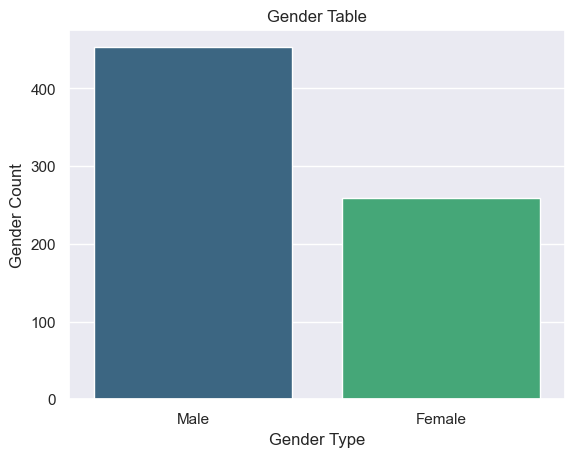

In [23]:
sns.barplot(x=['Male','Female'],y=df.Sex.value_counts(),palette='viridis')
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()

### Age Column

In [24]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

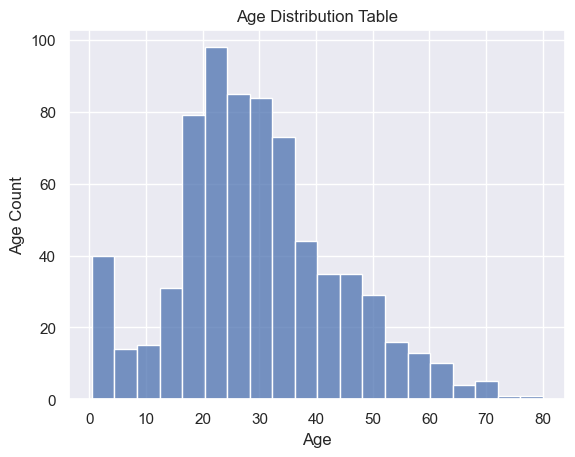

In [25]:
sns.histplot(x=df['Age'],bins=20)
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()

### SibSp column

In [26]:
df.SibSp.value_counts()

SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64

<Axes: ylabel='count'>

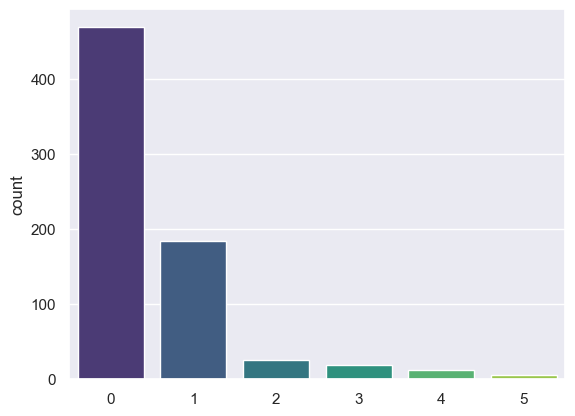

In [27]:
sns.barplot(x=['0','1','2','3','4','5'],y=df.SibSp.value_counts(),palette='viridis')

# Whether a passenger on the titanic survived or not:


### Multi Variate Analysis



In [28]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           195
        0            64
male    0           360
        1            93
Name: count, dtype: int64

#### > Alot more Males Died than Females because at this instances males priotize women to survive than men
####  > More Men Died than Survived
######  > More Female Survived than Died

In [29]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           120
        0            64
2       0            90
        1            83
3       0           270
        1            85
Name: count, dtype: int64



##### >  Most People Died from Class 3 because this was the closest to the ocean
#####  >  People from Class 1 where the most ones survived as they were the highest from the ocean and they were priotized to get on boats
#####   > People from Class 2 where almost 50/50 to survive



In [30]:
df.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            80
                0             3
        male    0            61
                1            40
2       female  1            68
                0             6
        male    0            84
                1            15
3       female  0            55
                1            47
        male    0           215
                1            38
Name: count, dtype: int64

##### >    Least men died where from Class 1 and only 3 women died from class 1
##### >    Most men and women died where from Class 3
##### >    The only Class that more Females Died than Survived where in Class 1
##### >    The least percantage of men that died where on Class 1
##### >    This Concludes that Class 1 was the most priotized and safest place on the Ship

In [32]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()

AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

##### > Most people died were from ages 19-35 after it people from ages 36-50